

# Projeto: Previsão de Turnover de Funcionários

##Neste projeto vamos testar três modelos de machine learning (Random Forest, Regressão Logística e Redes Neurais) para prever qual a chance de um funcionário de sair da empresa


<img src="Turnover.jpg" width=500 height=500>


- **O que é Turnover**: significa a taxa de rotatividade de de colaboradores dentro de uma empresa, sendo uma das áreas mais importantes para setores de Recursos Humanos em processos de gestão de pessoas. 
- **Importância da análise de turnover dentro das empresas**: o índice de giro de funcionários é essencial para a determinação de políticas de recursos humanos dentro da empresa, desde treinamentos até benefícios e programa de retenção de talentos. 
- **Custos do turnover para as empresas**: gastos com novas contratações e processos de seleção, gastos com treinamento e baixa produtividade de funcionários que ingressam na empresa, despesas trabalhistas de desligamento e contratação de funcionários, entre outros
- *A base de dados usada será a IBM HR Analytics Employee Attrition & Performance*: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-Attrition-dataset


## Explorando os Dados

Vamos começar importando as bibliotecas do python que serão usadas, e analisando o Dataset

A coluna 'Turnover' (desgaste do funcionário) será a variável que vamos prever. Vamos renomear a coluna para 'Turnover' e depois colocá-la como a última coluna, para facilitar o trabalho com o Dataset

In [1]:
# Importando as bibliotecas que serão usadas 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Por padrão, o pandas mostra as primeiras dez e as últimas dez colunas do Dataframe.
# Usaremos essa comando para que o pandas mostre todas as colunas
pd.options.display.max_columns = 35

In [3]:
# Carregando o Dataset 'Turnover_Funcionários'

empregados_df = pd.read_csv('Turnover_Funcionários.csv')

In [4]:
# Conferindo a quantidade de colunas e linhas do DataFrame

empregados_df.shape

(1470, 35)

In [5]:
# Vamos visualizar as primeiras cinco linhas do DataFrame
empregados_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
# Checando o nome e Dtype de cada coluna (Feature)
empregados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Checando se há valores nulos nas colunas ou se existem linhas repetidas

print(f'No Dataframe há {empregados_df.duplicated().sum()} linhas repetidas')
print(f'No Dataframe há {empregados_df.isnull().sum().sum()} valores nulos')

No Dataframe há 0 linhas repetidas
No Dataframe há 0 valores nulos


In [8]:
# Descrição estatística das colunas numéricas (valor mínimo e máximo, desvio padrão e média)
# Serão usados principalmente para detecção de outliers que possam desbalancear os algoritmos de machine learning
empregados_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Descrição estatística das colunas categóricas (quantidade de categorias diferentes, quais mais aparecem na coluna e a frequência)
empregados_df.describe(include=["O"])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


## Pré-processamentos dos Dados

In [10]:
# Verificando a ordem e o nome das colunas para poder renomear e deixar a coluna 'Turnover' no final do DataFrame
empregados_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
# Renomeamos a coluna 'Turnover' para 'Turnover'

empregados_df.columns = ['Age', 'Turnover', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [12]:
# Passamos a coluna 'Turnover' para o final do DataFrame
empregados_df = empregados_df[['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Turnover']]

## Tratamento das colunas categóricas usando a técnica One Hot Encoding

### Data Preprocessing

Podemos ver que existem várias colunas que contêm atributos não numéricos. 
A maioria dos algoritmos de machine learning esperam dados númericos, o que requer que as variáveis categóricas sejam convertidas em numéricas.
Por esse motivo, iremos converter as únicas duas variáveis das colunas 'Turnover', 'OverTime' e 'Over18' para 1 (Yes) ou 0 (No)</p>


In [13]:
# Aplicando uma função lambda nas colunas convertendo Yes para 1 e No para 0 nas colunas 'Turnover', 'OverTime' e 'Over18'

empregados_df['Turnover'] = empregados_df['Turnover'].apply(lambda x: 1 if x == 'Yes' else 0)
empregados_df['OverTime'] = empregados_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
empregados_df['Over18'] = empregados_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [14]:
# Conferindo se a função foi aplicada corretamente

empregados_df[['Turnover', 'OverTime', 'Over18']].head()

,Turnover,OverTime,Over18
0,1,1,1
1,0,0,1
2,1,1,1
3,0,1,1
4,0,0,1


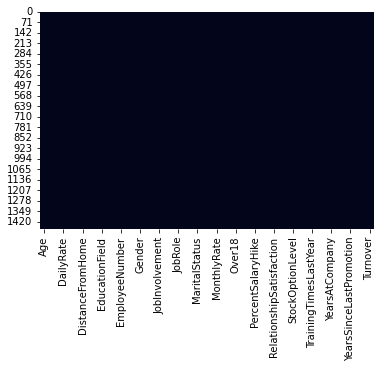

In [15]:
# Mapa de calor para visualizar se há valores faltantes

sns.heatmap(empregados_df.isnull(), cbar = False);

## Visualização dos dados

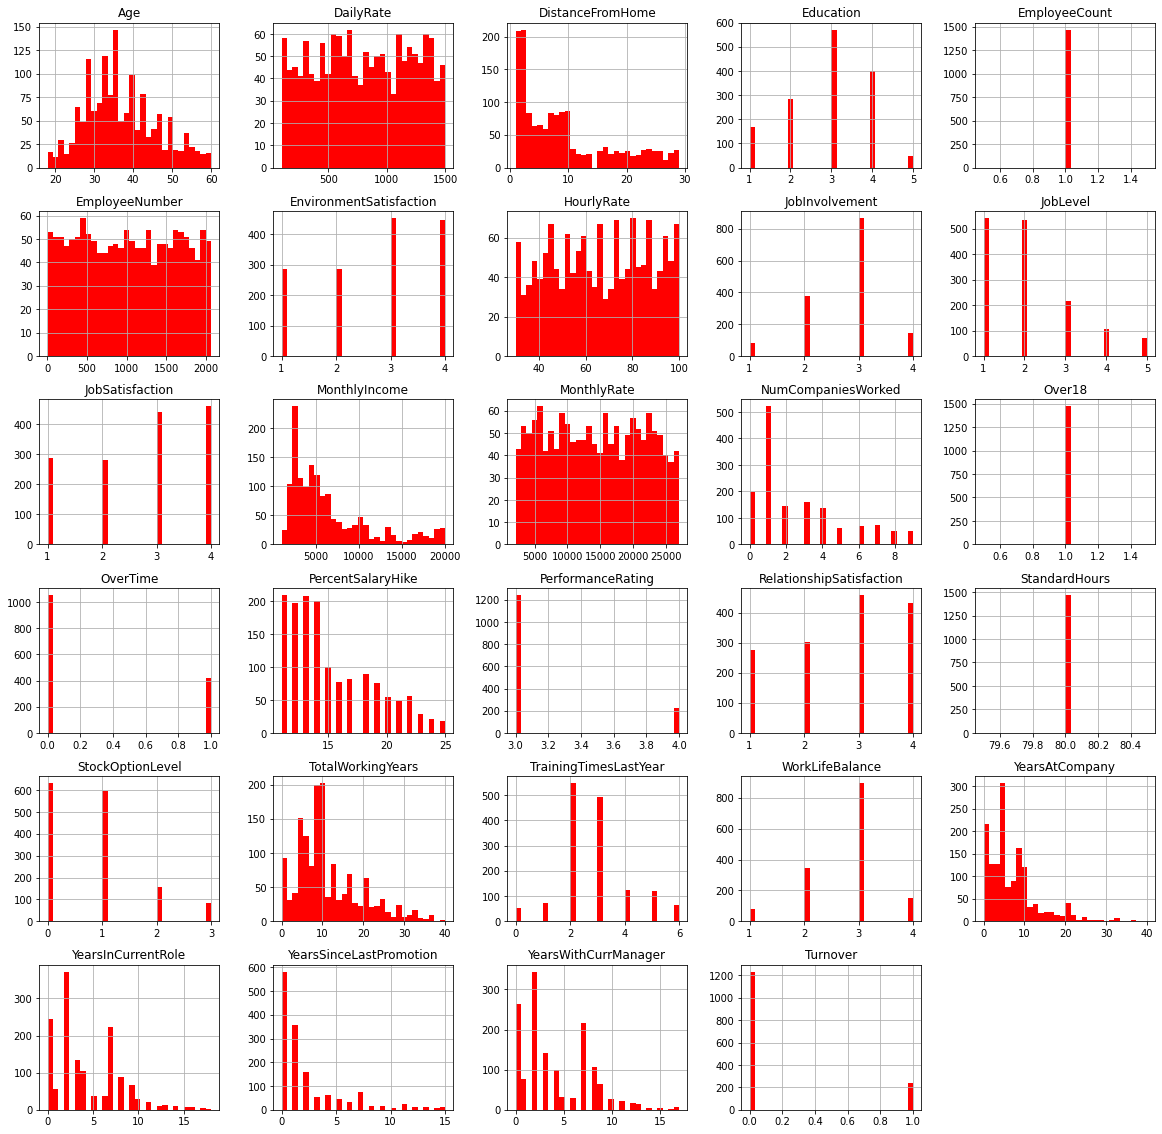

In [16]:
# Histogramas das colunas numéricas

empregados_df.hist(bins = 30, figsize=(20,20), color = 'r');

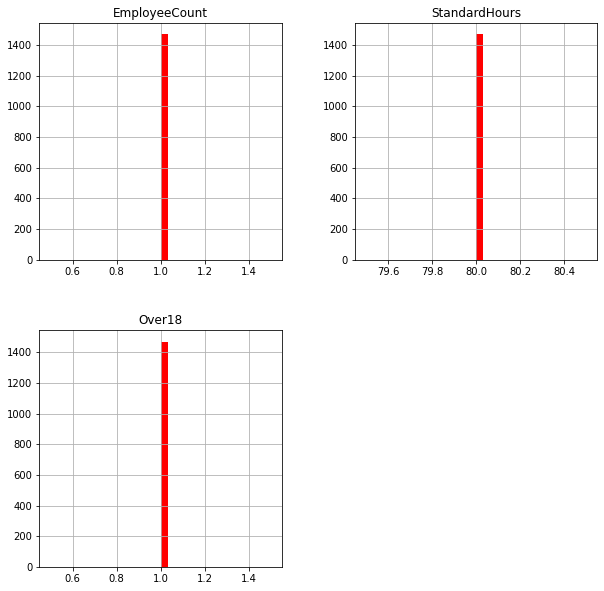

In [17]:
empregados_df[['EmployeeCount', 'StandardHours', 'Over18']].hist(bins = 30, figsize=(10,10), color = 'r');

In [18]:
# Pelos gráficos das variáveis 'EmployeeCount', 'StandardHours', 'Over18', podemos perceber que elas só tem um valor
# Por isso não fazem diferença na avaliação dos algoritmos
# A coluna 'EmployeeNumber' tem relação apenas com o ID do funcionário, e por esse motivo também pode ser removida do DataFrame 

empregados_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)

In [19]:
empregados_df.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Turnover
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0


In [20]:
sairam_df = empregados_df[empregados_df['Turnover'] == 1]
ficaram_df = empregados_df[empregados_df['Turnover'] == 0]

In [21]:
print(f'Total = {len(empregados_df)}')
print(f'Número de funcionários que saíram da empresa = {len(sairam_df)}')
print(f'Porcentagem de funcionários que saíram da empresa = {round(len(sairam_df) / len(empregados_df) * 100,2)}%')
print(f'Número de funcionários que ficaram na empresa = {len(ficaram_df)}')
print(f'Porcentagem de funcionários que ficaram na empresa = {round(len(ficaram_df) / len(empregados_df) * 100, 2)}%')

Total = 1470
Número de funcionários que saíram da empresa = 237
Porcentagem de funcionários que saíram da empresa = 16.12%
Número de funcionários que ficaram na empresa = 1233
Porcentagem de funcionários que ficaram na empresa = 83.88%


In [22]:
sairam_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Turnover
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0
mean,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321,1.0
std,9.689350,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349,0.0
min,18.000000,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,28.000000,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.0
50%,32.000000,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.0
75%,39.000000,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000,1.0
max,58.000000,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000,1.0


In [23]:
ficaram_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Turnover
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.0
mean,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397,0.0
std,8.888360,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116,0.0
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,31.000000,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.0
50%,36.000000,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000,0.0
75%,43.000000,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.0
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000,0.0


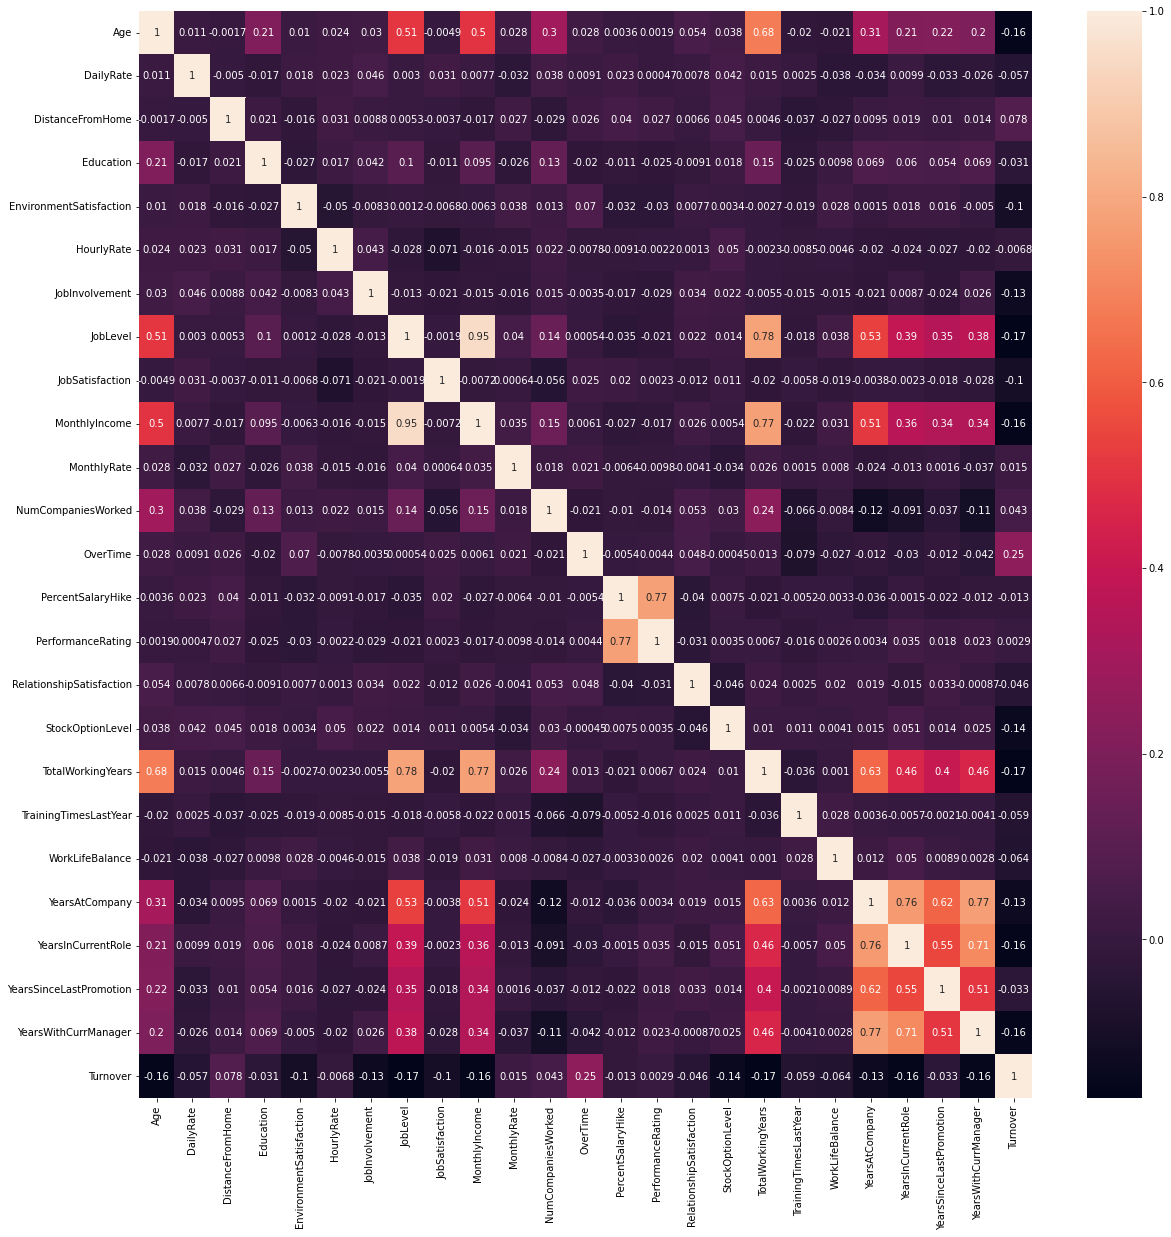

In [24]:
# Heatmap das correlações entre as variáveis númericas
correlacoes = empregados_df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlacoes, annot=True);

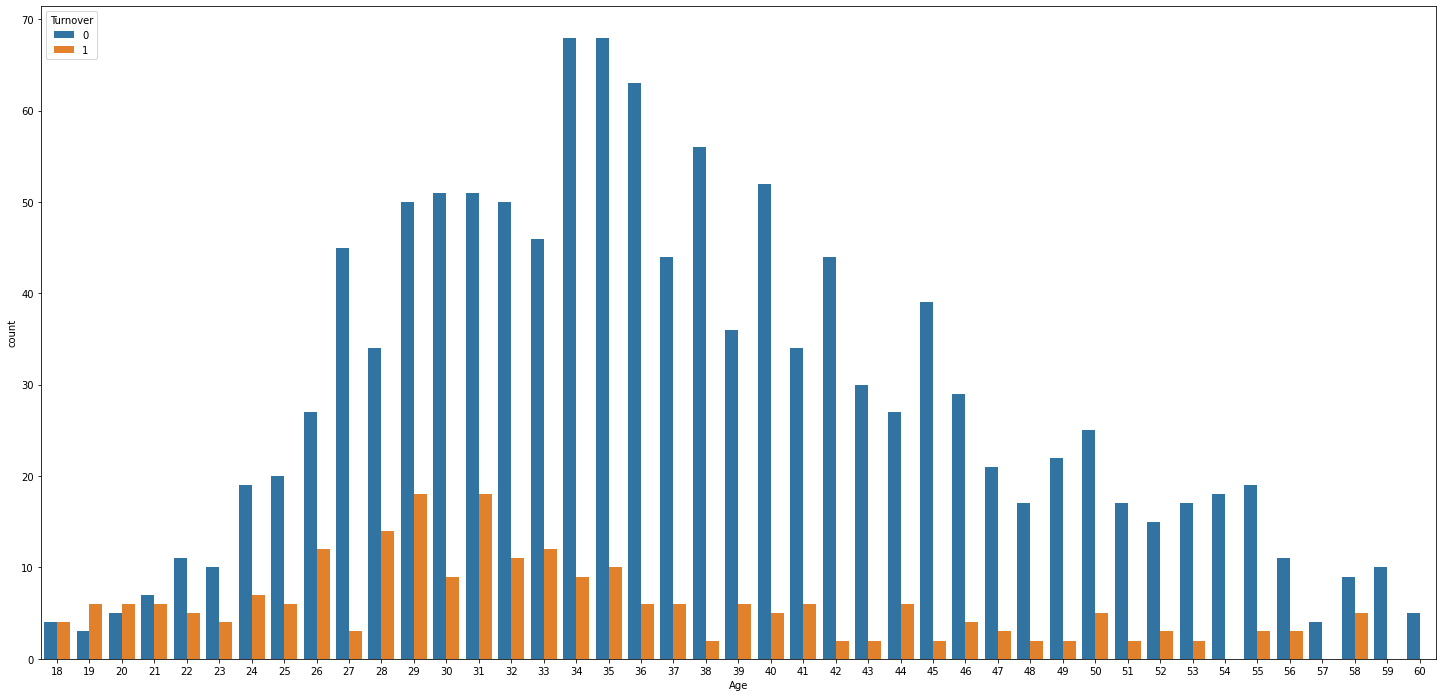

In [25]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Turnover', data=empregados_df);

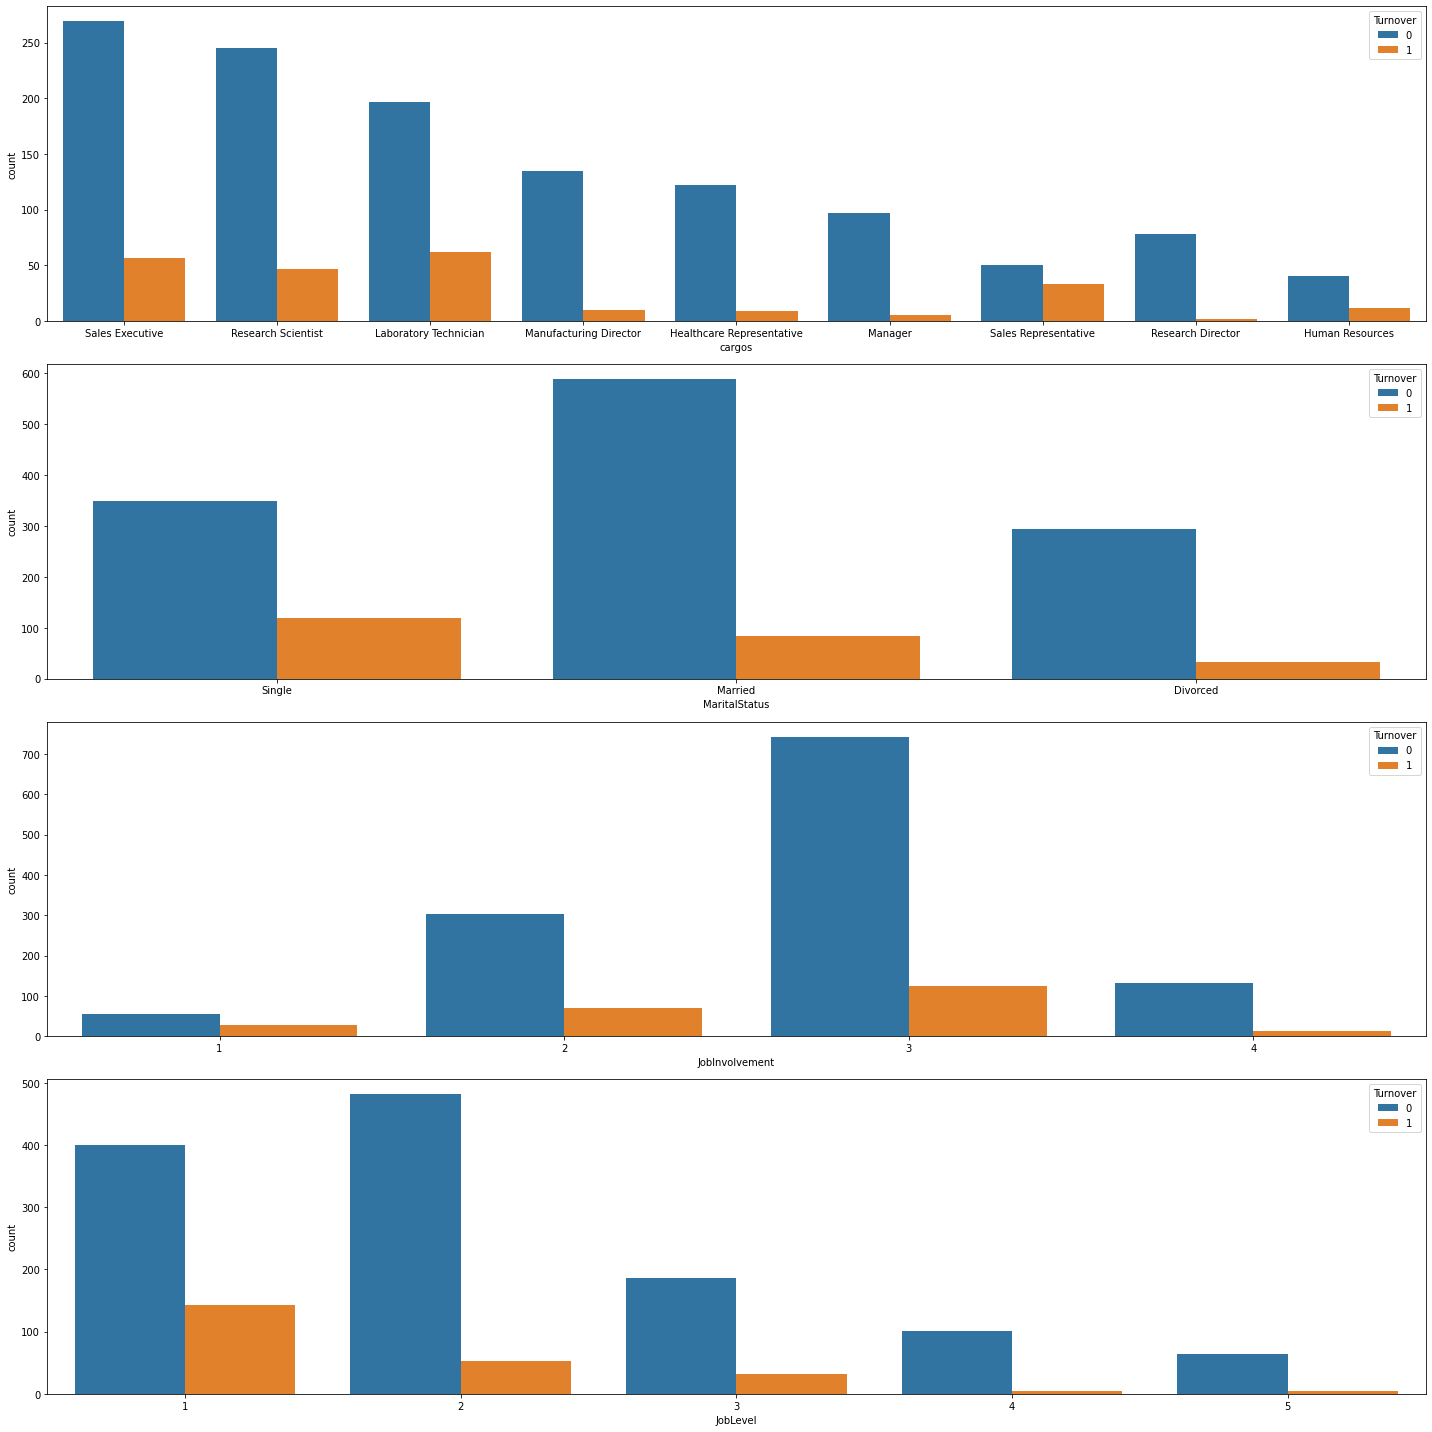

In [26]:
plt.figure(figsize=[20,20])
plt.subplot(4,1,1)
sns.countplot(x = 'JobRole', hue = 'Turnover', data = empregados_df)
plt.xlabel('cargos')
plt.subplot(4,1,2)
sns.countplot(x = 'MaritalStatus', hue = 'Turnover', data = empregados_df)
plt.subplot(4,1,3)
sns.countplot(x = 'JobInvolvement', hue = 'Turnover', data = empregados_df)
plt.subplot(4,1,4)
sns.countplot(x = 'JobLevel', hue = 'Turnover', data = empregados_df);

plt.tight_layout()

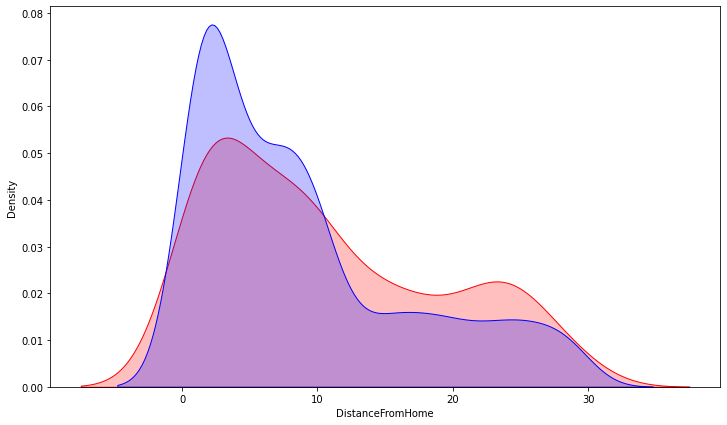

In [27]:
# KDE (Kernel Density Estimate)
plt.figure(figsize=(12,7))
sns.kdeplot(sairam_df['DistanceFromHome'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(ficaram_df['DistanceFromHome'], label = 'Funcionários que ficaram', shade = True, color = 'b');

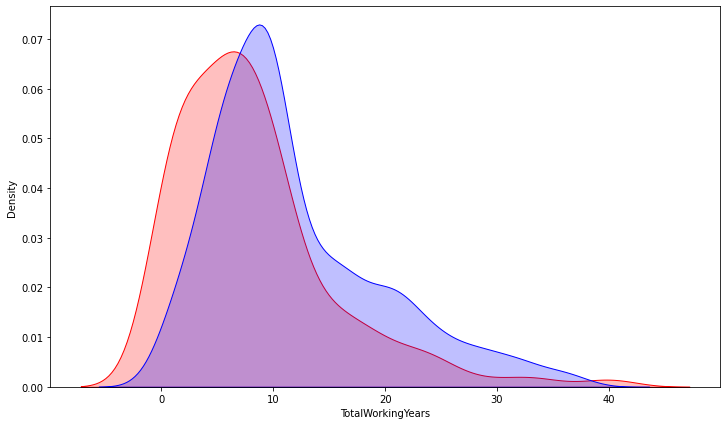

In [28]:
plt.figure(figsize=(12,7))
sns.kdeplot(sairam_df['TotalWorkingYears'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(ficaram_df['TotalWorkingYears'], label = 'Funcionários que ficaram', shade = True, color = 'b');

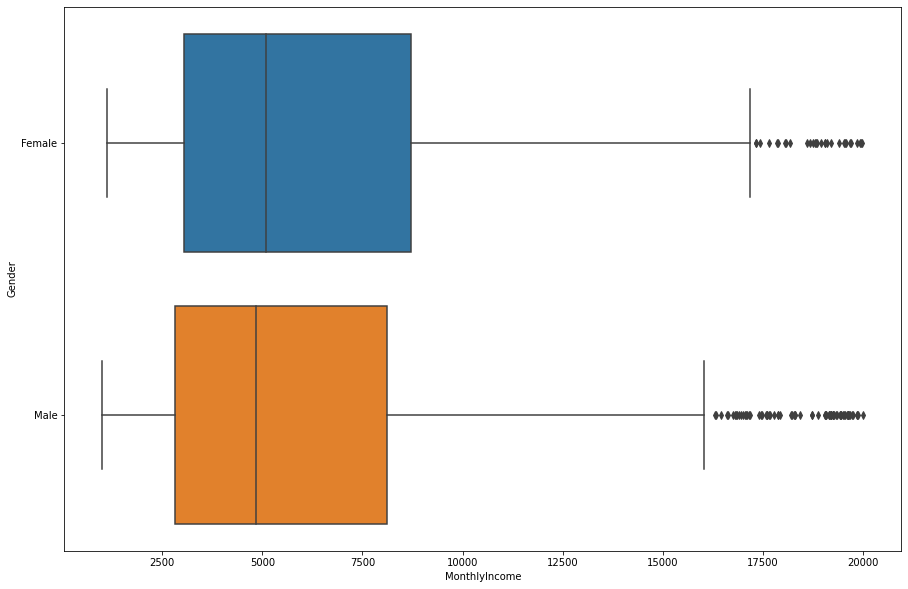

In [29]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data=empregados_df);

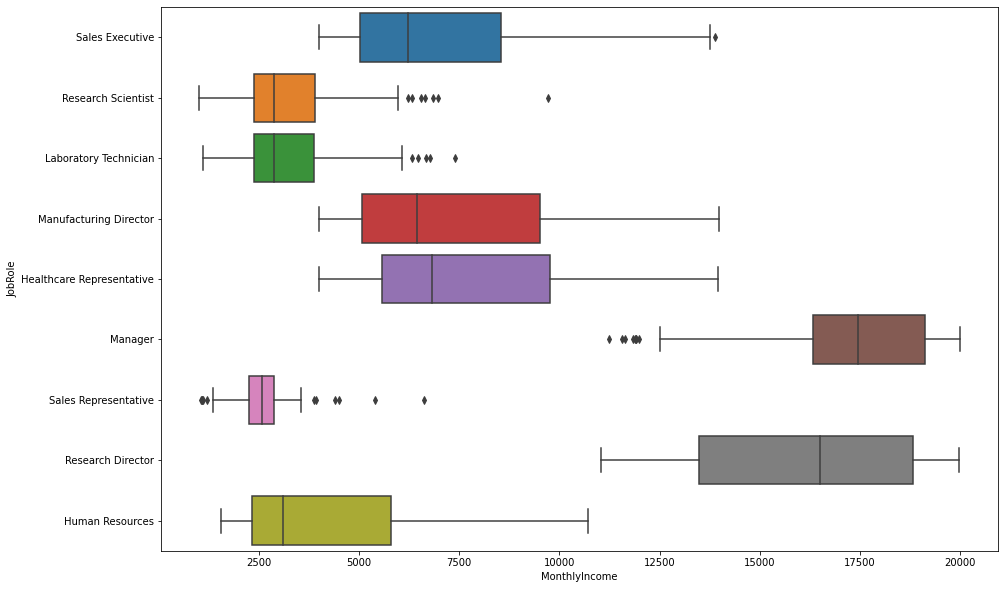

In [30]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=empregados_df);

## Pré-processamento e bases de treinamento/teste

In [31]:
empregados_df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Turnover
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0


In [32]:
X_cat = empregados_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
onehotencoder = OneHotEncoder()

In [35]:
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [36]:
X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [37]:
X_cat.shape

(1470, 26)

In [38]:
type(X_cat)

numpy.ndarray

In [39]:
X_cat = pd.DataFrame(X_cat)

In [40]:
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [41]:
# Male Female
# 1    0
# 0    1

# Single Married Divorced
# 1      0       0
# 0      1       0
# 0      0       1

In [42]:
X_numerical = empregados_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [43]:
X_all = pd.concat([X_cat, X_numerical], axis=1)
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [44]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [45]:
X_all.columns

Index([                         0,                          1,
                                2,                          3,
                                4,                          5,
                                6,                          7,
                                8,                          9,
                               10,                         11,
                               12,                         13,
                               14,                         15,
                               16,                         17,
                               18,                         19,
                               20,                         21,
                               22,                         23,
                               24,                         25,
                            'Age',                'DailyRate',
               'DistanceFromHome',                'Education',
        'EnvironmentSatisfaction',               'Hourl

In [46]:
X_all.columns[:26]

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25],
      dtype='object')

In [47]:
colunas_int_para_str = X_all.columns[:26].astype(str)

In [48]:
X_all.columns[:26]

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25],
      dtype='object')

In [49]:
# Transformei as colunas númericas para string 
# porque os normalizadores do sklearn.preprocessing não aceitarão nomes de colunas (features) que não sejam strings a partir do 1.2

X_all = X_all.rename(columns=str)

In [50]:
X_all.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [51]:
# A normalização das variáveis é importante para que os algoritmos de machine learning não dêem importância maior para as variáveis com escala maior 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [52]:
type(X)

numpy.ndarray

In [53]:
y = empregados_df['Turnover']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Turnover, Length: 1470, dtype: int64

In [54]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [56]:
X_train.shape, y_train

((1102, 50), 944     0
 1402    0
 1054    0
 1128    0
 1323    0
        ..
 763     0
 835     0
 1216    0
 559     0
 684     0
 Name: Turnover, Length: 1102, dtype: int64)

In [57]:
X_test.shape, y_test

((368, 50), 442     0
 1091    0
 981     1
 785     0
 1332    1
        ..
 557     0
 831     1
 686     0
 969     0
 1395    1
 Name: Turnover, Length: 368, dtype: int64)

# Regressão logística

## Usada para prever saídas BINÁRIAS

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [60]:
y_pred_logistica = logistic.predict(X_test)
y_pred_logistica

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [61]:
y_test

442     0
1091    0
981     1
785     0
1332    1
       ..
557     0
831     1
686     0
969     0
1395    1
Name: Turnover, Length: 368, dtype: int64

In [62]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [63]:
acuracia_logistica = accuracy_score(y_test, y_pred_logistica)
precisao_logistica = precision_score(y_test, y_pred_logistica)
sensibilidade_logistica = recall_score(y_test, y_pred_logistica)
f1_logistica = f1_score(y_test, y_pred_logistica)
classificacao_logistica = classification_report(y_test, y_pred_logistica)
matriz_logistica = confusion_matrix(y_test, y_pred_logistica)

In [64]:
print(f'A acurácia do modelo de Regressão Logística foi de {round(acuracia_logistica*100, 2)}%')
print(f'A precisão do modelo de Regressão Logística foi de {round(precisao_logistica*100, 2)}%')
print(f'A sensibilidade do modelo de Regressão Logística foi de {round(sensibilidade_logistica*100, 2)}%')
print(f'O f1_score do modelo de Regressão Logística foi de {round(f1_logistica*100, 2)}%')

A acurácia do modelo de Regressão Logística foi de 89.13%
A precisão do modelo de Regressão Logística foi de 82.14%
A sensibilidade do modelo de Regressão Logística foi de 39.66%
O f1_score do modelo de Regressão Logística foi de 53.49%


In [65]:
matriz_logistica

array([[305,   5],
       [ 35,  23]])

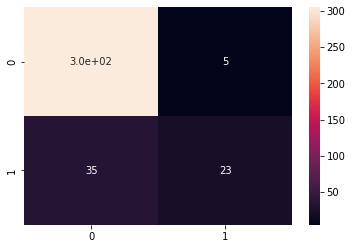

In [66]:
sns.heatmap(matriz_logistica, annot=True);

In [67]:
# Precision
23 / (23 + 3)

0.8846153846153846

In [68]:
# Recall
23 / (23 + 43)

0.3484848484848485

- Precision: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
- Recall: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
- F1: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [69]:
print(classificacao_logistica)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       310
           1       0.82      0.40      0.53        58

    accuracy                           0.89       368
   macro avg       0.86      0.69      0.74       368
weighted avg       0.89      0.89      0.87       368



# Random forest

## Random Forest é considerado um conjunto de algoritmos (ensemble)
## Cria um conjunto de árvores de decisão baseados em atributos randômicos
## Combina os votos de diferentes árvores de decisão

In [70]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [71]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [72]:
y_pred_forest = forest.predict(X_test)
y_pred_extratree = extratree.predict(X_test)

In [73]:
acuracia_forest = accuracy_score(y_test, y_pred_forest)
precisao_forest = precision_score(y_test, y_pred_forest)
sensibilidade_forest = recall_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)
classificacao_forest = classification_report(y_test, y_pred_forest)
matriz_forest = confusion_matrix(y_test, y_pred_forest)

In [74]:
acuracia_extratree = accuracy_score(y_test, y_pred_extratree)
precisao_extratree = precision_score(y_test, y_pred_extratree)
sensibilidade_extratree = recall_score(y_test, y_pred_extratree)
f1_extratree = f1_score(y_test, y_pred_extratree)
classificacao_extratree = classification_report(y_test, y_pred_extratree)
matriz_extratree = confusion_matrix(y_test, y_pred_extratree)

In [75]:
print(f'A acurácia do modelo de Random Forest foi de {round(acuracia_forest*100, 2)}%')
print(f'A precisão do modelo de Random Forest foi de {round(precisao_forest*100, 2)}%')
print(f'A sensibilidade do modelo de Random Forest foi de {round(sensibilidade_forest*100, 2)}%')
print(f'O f1_score do modelo de Random Forest foi de {round(f1_forest*100, 2)}%')

A acurácia do modelo de Random Forest foi de 85.87%
A precisão do modelo de Random Forest foi de 87.5%
A sensibilidade do modelo de Random Forest foi de 12.07%
O f1_score do modelo de Random Forest foi de 21.21%


In [76]:
print(f'A acurácia do modelo de Extra Tree Classifier foi de {round(acuracia_extratree*100, 2)}%')
print(f'A precisão do modelo de Extra Tree Classifier foi de {round(precisao_extratree*100, 2)}%')
print(f'A sensibilidade do modelo de Extra Tree Classifier foi de {round(sensibilidade_extratree*100, 2)}%')
print(f'O f1_score do modelo de Extra Tree Classifier foi de {round(f1_extratree*100, 2)}%')

A acurácia do modelo de Extra Tree Classifier foi de 86.96%
A precisão do modelo de Extra Tree Classifier foi de 85.71%
A sensibilidade do modelo de Extra Tree Classifier foi de 20.69%
O f1_score do modelo de Extra Tree Classifier foi de 33.33%


In [77]:
matriz_forest

array([[309,   1],
       [ 51,   7]])

In [78]:
matriz_extratree

array([[308,   2],
       [ 46,  12]])

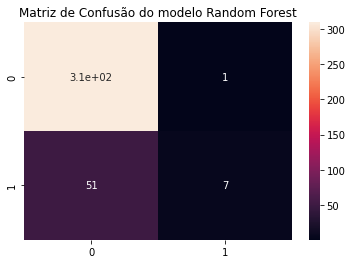

In [79]:
plt.title('Matriz de Confusão do modelo Random Forest')
sns.heatmap(matriz_forest, annot=True);

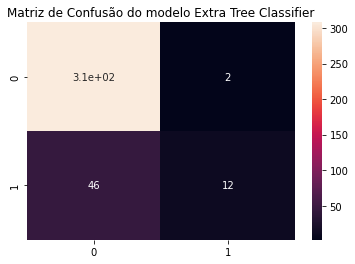

In [80]:
plt.title('Matriz de Confusão do modelo Extra Tree Classifier')
sns.heatmap(matriz_extratree, annot=True);

In [81]:
print(classificacao_forest)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       310
           1       0.88      0.12      0.21        58

    accuracy                           0.86       368
   macro avg       0.87      0.56      0.57       368
weighted avg       0.86      0.86      0.81       368



In [82]:
print(classificacao_extratree)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       310
           1       0.86      0.21      0.33        58

    accuracy                           0.87       368
   macro avg       0.86      0.60      0.63       368
weighted avg       0.87      0.87      0.83       368



## Redes neurais artificiais

- Quantos neurônios e quantas camadas? https://iaexpert.academy/2020/05/04/quantas-camadas-escondidas-e-quantos-neuronios-incluir-numa-rede-neural-artificial/

In [83]:
# A biblioteca tensorflow é otimizada para deep learning
import tensorflow as tf

In [84]:
X_train.shape

(1102, 50)

In [85]:
(76 + 1) / 2

38.5

In [86]:
rede_neural = tf.keras.models.Sequential()     # classe para definir camada neural para o TensorFlow
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))   # Adicionando a primeira camada oculta de entrada de neurônios
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))    # Adicionando a segunda camada oculta de entrada de neurônios
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))    # Adicionando a tercerira camada oculta de entrada de neurônios
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))  # Adicionando a camada de saída  

In [87]:
# .summary é o método para visualizar a estrautura da rede neural (cada camada)

rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [88]:
# o parâmetro optimazer é o algoritmo usado para fazer o ajuste dos 4.941 "pesos"
# o parâmetro loss é como o erro vai ser calculado (loss='binary_crossentropy' porque é um problema de classificação binária)

rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [89]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 2ms/step - loss: 0.4814 - accuracy: 0.8194
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8376
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8376
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8412
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8494
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8575
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8584
Epoch 8/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8675
Epoch 9/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8802
Epoch 10/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8784
Epoch 11/

In [90]:
y_pred_neural = rede_neural.predict(X_test)
y_pred_neural

12/12 [==============================] - 0s 2ms/step


array([[1.45300397e-10],
       [1.21282973e-09],
       [5.07245641e-05],
       [7.53713891e-07],
       [1.00000000e+00],
       [2.17765889e-10],
       [9.99383748e-01],
       [3.58082054e-13],
       [4.59133844e-07],
       [5.10974763e-10],
       [3.62918496e-01],
       [4.41395268e-02],
       [2.66575562e-08],
       [4.23680931e-01],
       [4.60311549e-06],
       [2.11425634e-11],
       [3.64544896e-12],
       [7.65776600e-16],
       [1.01369332e-13],
       [9.74707817e-08],
       [2.89497937e-09],
       [1.61482461e-07],
       [1.91448853e-05],
       [1.78334551e-06],
       [9.99999881e-01],
       [9.99999583e-01],
       [8.20213359e-07],
       [1.66420872e-15],
       [1.00000000e+00],
       [6.24380547e-09],
       [4.52005683e-10],
       [6.91990554e-03],
       [1.93506584e-03],
       [1.33634428e-08],
       [1.47145886e-13],
       [8.07462550e-14],
       [9.99984145e-01],
       [5.18131287e-07],
       [1.18534405e-10],
       [1.26520050e-07],


In [91]:
# Definindo o threshold (limite) para a classificação binária

y_pred_neural = (y_pred_neural >= 0.5)
y_pred_neural

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [92]:
matriz_neural = confusion_matrix(y_test, y_pred_neural)
matriz_neural

array([[287,  23],
       [ 39,  19]])

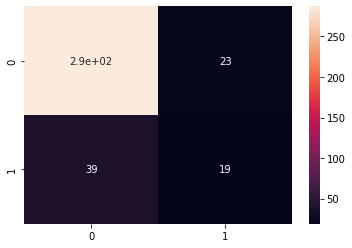

In [93]:
sns.heatmap(matriz_neural, annot=True);

In [94]:
print(classification_report(y_test, y_pred_neural))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       310
           1       0.45      0.33      0.38        58

    accuracy                           0.83       368
   macro avg       0.67      0.63      0.64       368
weighted avg       0.81      0.83      0.82       368



## Salvar o classificador

In [95]:
# picle é a biblioteca usada para salvar as variáveis (ou modelos e restaurá-los já treinados)
import pickle

In [96]:
# o primeiro parâmetro do método .dump() define as variáveis que serão salvas (com nome f)
# as variáveis scaler e onehotencoder precisam ser salvas para deixar os próximos dados no formato para ser colocado no modelo

with open('variaveis_modelo.pkl', 'wb') as f:
  pickle.dump([scaler, onehotencoder, logistic], f)

In [97]:
with open('variaveis_modelo.pkl', 'rb') as f:
  min_max, encoder, model = pickle.load(f)

In [98]:
min_max, encoder, model

(MinMaxScaler(), OneHotEncoder(), LogisticRegression(max_iter=1000))

In [99]:
X_novo = empregados_df.iloc[0:1]
X_novo

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Turnover
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1


In [100]:
X_cat_novo = X_novo[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat_novo

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single


In [101]:
# Não usei o método .fit_tranform porque a variável foi salva depois de treinada

X_cat_novo = encoder.transform(X_cat_novo).toarray()

In [102]:
X_cat_novo

array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [103]:
X_cat_novo = pd.DataFrame(X_cat_novo)
X_cat_novo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [104]:
X_numerical_novo = X_novo[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical_novo

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5


In [105]:
X_all_novo = pd.concat([X_cat_novo, X_numerical_novo], axis = 1)
X_all_novo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5


In [106]:
X_all_novo = X_all_novo.rename(columns=str)

In [107]:
X_novo = min_max.transform(X_all_novo)
X_novo

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.54761905, 0.71581961, 0.        , 0.25      ,
        0.33333333, 0.91428571, 0.66666667, 0.25      , 1.        ,
        0.26245392, 0.6980526 , 0.88888889, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.15      , 0.22222222, 0.        , 0.29411765]])

In [108]:
model.predict(X_novo)

array([1])

In [109]:
# O método .predict_proba retorna a probabilidade de cada label (0 e 1)

model.predict_proba(X_novo)

array([[0.34379861, 0.65620139]])

In [110]:
# O método .classes_ retorna qual é o label de cada probabilidade do .predict_proba

model.classes_

array([0, 1])

In [111]:
# A probabilidade de ser 1 (turnover do novo funcionário) é de 65 %

In [112]:
def novos_dados (funcionario: pd.DataFrame = empregados_df): 

  """função para automatizar a previsão de novos dados"""

  with open('variaveis_modelo.pkl', 'rb') as f:
    min_max, encoder, model = pickle.load(f)
  X_novo = funcionario.iloc[0:1]
  X_cat_novo = X_novo[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
  X_cat_novo = encoder.transform(X_cat_novo).toarray()
  X_cat_novo = pd.DataFrame(X_cat_novo)
  X_numerical_novo = X_novo[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
  X_all_novo = pd.concat([X_cat_novo, X_numerical_novo], axis = 1)
  X_all_novo = X_all_novo.rename(columns=str)
  X_novo = min_max.transform(X_all_novo)
  previsao = model.predict(X_novo)
  probabilidade = model.predict_proba(X_novo)
  print(f"A probabilidade do funcionário não sair é de {round(probabilidade[0][0],5)*100}%\nA probabilidade do funcionário sair é de {round(probabilidade[0][1],5)*100}%")

In [113]:
model.predict_proba(X_novo)[0]

array([0.34379861, 0.65620139])

In [114]:
novos_dados()

A probabilidade do funcionário não sair é de 34.38%
A probabilidade do funcionário sair é de 65.62%
